In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0) # reduit l'aleatoire
x,y = make_regression(n_samples=100, n_features=2, noise=10)

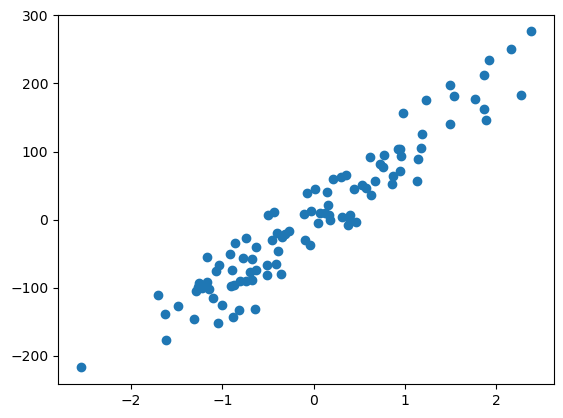

In [3]:
plt.scatter(x[:,1],y)

In [4]:
print(x.shape)
y = y.reshape(100,1)
print(y.shape)

(100, 2)
(100, 1)


In [5]:
X = np.hstack((x,np.ones((x.shape[0],1))))


In [6]:
theta = np.random.randn(3,1)
print(theta)

[[-0.82646112]
 [ 0.78420863]
 [-0.1954172 ]]


In [7]:
# Model

In [8]:
def model(X,theta):
    return X.dot(theta)

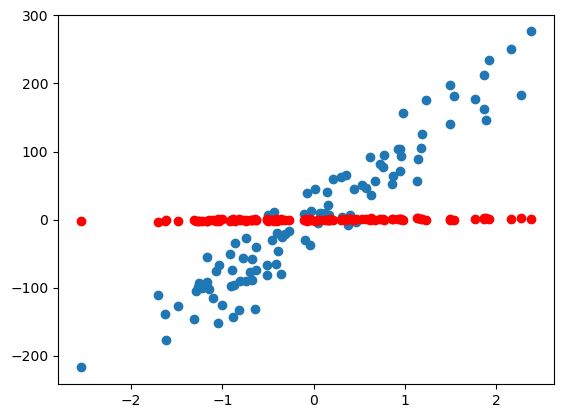

In [9]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],model(X,theta),c='r')

In [10]:
#La fonction Cout

In [11]:
def cost_function(X,y,theta):
    m = len(y)
    return (1/2*m) * np.sum((model(X,theta) - y)**2 )

cost_function(X,y,theta)

52940713.429260276

In [12]:
# gradient

In [13]:
def grad(X,y,theta):
    m=len(y)
    return (1/m) * X.T.dot( model(X,theta) - y )

grad(X,y,theta)

array([[ -28.57889511],
       [-100.06029486],
       [  -3.80096722]])

In [14]:
# descente de gradient

In [15]:
def grad_descent(X,y,theta,learning_rate,n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0,n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta,cost_history


In [16]:
# Machine learning

In [17]:
theta_final,cost_history = grad_descent(X,y,theta,learning_rate=0.01, n_iteration=1000)

In [18]:
# Predictions

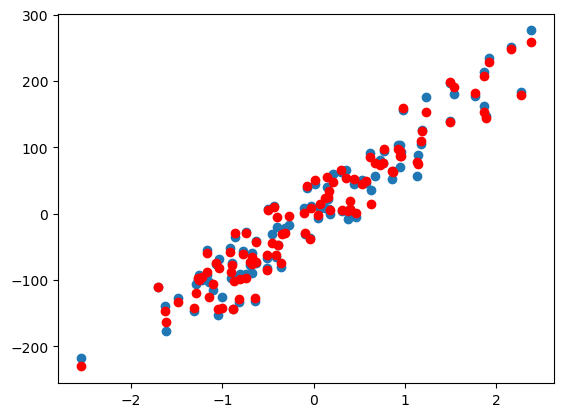

In [19]:
plt.scatter(x[:,1],y)
predictions = model(X,theta_final)
plt.scatter(x[:,1],predictions,c='r')

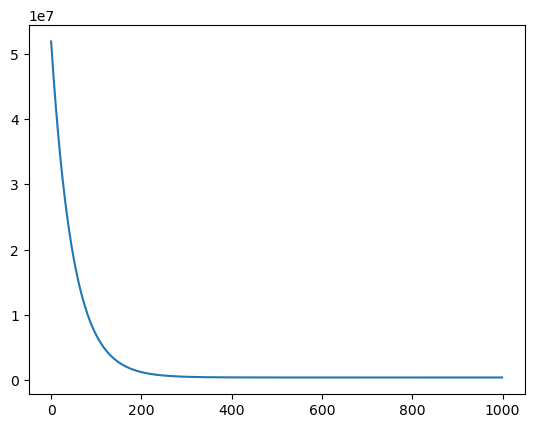

In [20]:
plt.plot(range(0,1000),cost_history)

In [21]:
# Coefition de determination

In [22]:
def coef_det(y,pred):
    u = (( y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_det(y,predictions)

0.9916687122277607

In [23]:
# Print Dataset and Predictions in 3D

<IPython.core.display.Javascript object>


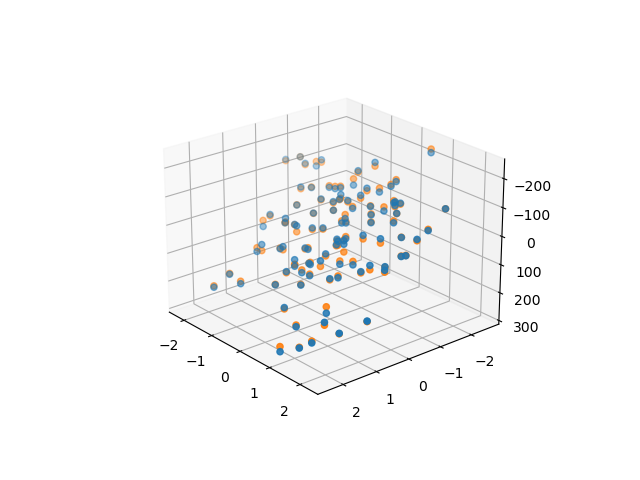

In [31]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions)